# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# COLORS = ["#333333", "#999ea2", "#6fa2d0", "#4d759a", "#073763"][::-1]
# COLORS = ["#1B262C", "#0F4C75", "#3282B8", "#BBE1FA"]
COLORS = ["#000057", "#4d759a", "#3282B8",  "#999ea2", "#4f4f4f", "#1B262C"]

MY_PALLETE = sns.color_palette("colorblind")
sns.set_palette(MY_PALLETE)

In [3]:
MY_PALLETE

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Data

In [4]:
df = pd.read_csv("../pipeline_experiment_result.csv")
df

/tmp/ipykernel_47116/2620244375.py:1: DtypeWarning: Columns (19,20,60,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../pipeline_experiment_result.csv")


,seed_i,config_id,fold,config_hash,duration,start_time,end_time,status,seed,budget,...,classifier:sgd:power_t,feature_preprocessor:nystroem_sampler:coef0,feature_preprocessor:nystroem_sampler:degree,classifier:multinomial_nb:alpha,classifier:multinomial_nb:fit_prior,classifier:sgd:l1_ratio,dataset,data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction
0,0,0,1,34a76cf2da6c41f8646867818eea56d6,1.913694,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
1,0,0,2,34a76cf2da6c41f8646867818eea56d6,1.911491,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
2,0,0,3,34a76cf2da6c41f8646867818eea56d6,2.011853,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
3,0,0,4,34a76cf2da6c41f8646867818eea56d6,2.025221,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
4,0,0,5,34a76cf2da6c41f8646867818eea56d6,2.001899,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037065,0,499,6,19a650aed428ed8e5fe1619c61bc7118,6.627506,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037066,0,499,7,19a650aed428ed8e5fe1619c61bc7118,6.571584,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037067,0,499,8,19a650aed428ed8e5fe1619c61bc7118,6.475392,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037068,0,499,9,19a650aed428ed8e5fe1619c61bc7118,6.478533,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN


In [5]:
df.shape

(1037070, 203)

In [6]:
df.columns.to_list()

['seed_i',
 'config_id',
 'fold',
 'config_hash',
 'duration',
 'start_time',
 'end_time',
 'status',
 'seed',
 'budget',
 'balancing:strategy',
 'classifier:__choice__',
 'data_preprocessor:__choice__',
 'feature_preprocessor:__choice__',
 'classifier:passive_aggressive:C',
 'classifier:passive_aggressive:average',
 'classifier:passive_aggressive:fit_intercept',
 'classifier:passive_aggressive:loss',
 'classifier:passive_aggressive:tol',
 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy',
 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__',
 'feature_preprocessor:select_percentile_classification:percentile',
 'feature_preprocessor:select_percentile_classification:score_func',
 'accuracy_train',
 'balanced_accuracy_train',
 'f1_macro_train',
 'f1_weighted_train',
 'precision_macro_train',
 'precision_weighted_train',
 'recall_macro_train',
 'recall_weighted_train',
 'accuracy_val',
 'balanced_accuracy_val',
 'f1_macro_val',
 'f1_weighte

# Exploratory Data Analysis on Pipeline Compositions

## Base Analysis

In [7]:
pipelines = df["classifier:__choice__"]+" + "+df["feature_preprocessor:__choice__"]
dfs = df \
    .assign(pipelines=pipelines) \
    .rename(columns={"classifier:__choice__": "classifier", "feature_preprocessor:__choice__": "preprocessor"})
dfs

,seed_i,config_id,fold,config_hash,duration,start_time,end_time,status,seed,budget,...,feature_preprocessor:nystroem_sampler:coef0,feature_preprocessor:nystroem_sampler:degree,classifier:multinomial_nb:alpha,classifier:multinomial_nb:fit_prior,classifier:sgd:l1_ratio,dataset,data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction,pipelines
0,0,0,1,34a76cf2da6c41f8646867818eea56d6,1.913694,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN,passive_aggressive + select_percentile_classif...
1,0,0,2,34a76cf2da6c41f8646867818eea56d6,1.911491,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN,passive_aggressive + select_percentile_classif...
2,0,0,3,34a76cf2da6c41f8646867818eea56d6,2.011853,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN,passive_aggressive + select_percentile_classif...
3,0,0,4,34a76cf2da6c41f8646867818eea56d6,2.025221,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN,passive_aggressive + select_percentile_classif...
4,0,0,5,34a76cf2da6c41f8646867818eea56d6,2.001899,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN,passive_aggressive + select_percentile_classif...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037065,0,499,6,19a650aed428ed8e5fe1619c61bc7118,6.627506,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN,decision_tree + pca
1037066,0,499,7,19a650aed428ed8e5fe1619c61bc7118,6.571584,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN,decision_tree + pca
1037067,0,499,8,19a650aed428ed8e5fe1619c61bc7118,6.475392,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN,decision_tree + pca
1037068,0,499,9,19a650aed428ed8e5fe1619c61bc7118,6.478533,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN,decision_tree + pca


In [30]:
def plot_boxplot_time_spent(dfs, measure, interest_col, group_by_cols, how="mean", slicer=None, figsize=(18, 6), directory="result/", top20=False):

    if not os.path.exists(directory):
        os.makedirs(directory)

    grouped_col = measure+"_"+how
    slicer_ = slicer
    slicer = slice(*slicer_) if slicer_ != None else None
   
    # compute average mean performance
    aux = dfs \
        .groupby(group_by_cols) \
        .agg(perf=(measure, how)) \
        .rename(columns={"perf": grouped_col}) \
        .reset_index()

    # order by median of boxplots
    aux_order = aux \
        .groupby([interest_col]) \
        .agg(perf_median=(grouped_col, "median")) \
        .sort_values(by="perf_median", ascending=False) \
        .reset_index() \
        .fillna(0)
    aux_order["perf_median"] = range(len(aux_order))

    aux_order = aux_order[slicer] if slicer is not None else aux_order

    def with_selection_ordered(d, ascending=True):
        aux = aux_order
        if top20:
            aux = pd.concat([aux.head(10), aux.tail(10)])
        return aux \
            .merge(d, on=interest_col,how="left") \
            .sort_values(by="perf_median", ascending=ascending) \
            .drop(columns="perf_median")

    # compute average rank
    rank = aux \
    .groupby("dataset")[grouped_col] \
    .rank(ascending=False) \
    .to_frame(name="rank")

    aux_rank = aux.merge(rank, left_index=True, right_index=True)

    # compute wins
    wins = aux_rank[aux_rank["rank"] == 1] \
        .groupby(interest_col) \
        .agg(wins=("rank", "sum")) \
        .reset_index()

    aux_wins = aux_rank[[interest_col]] \
        .drop_duplicates(interest_col) \
        .merge(wins, on=interest_col, how="left") \
        .fillna(0)

    # compute ties
    min_rank = aux_rank.groupby(["dataset"]).agg(min_rank=("rank", "min")).reset_index()
    ties = aux_rank \
        .merge(min_rank, on="dataset", how="left") \
        .query("rank == min_rank") \
        .query("rank > 1.0") \
        .groupby(interest_col) \
        .agg(tie=("rank", "count")) \
        .reset_index()
    
    aux_ties = aux_rank[[interest_col]] \
        .drop_duplicates(interest_col) \
        .merge(ties, on=interest_col, how="left") \
        .fillna(0)
    # compute_wins_ties
    aux_wins_ties = aux_ties.merge(aux_wins, on=interest_col, how="outer")
      
    f, axes = plt.subplots(1, 2, figsize=figsize)

    data_aux = with_selection_ordered(aux)
    g1 = sns.boxplot(data=data_aux, y=interest_col, x=grouped_col, color=MY_PALLETE[0], ax=axes[0])
    # g1 = sns.catplot(data=data_aux, kind="violin", x=grouped_col, y=interest_col, split=True, color=MY_PALLETE[0], ax=axes[0])


    data_rank = with_selection_ordered(aux_rank)
    g2 = sns.barplot(data=data_rank, y=interest_col, x="rank", color=MY_PALLETE[0], ax=axes[1])
    g2.set(ylabel=None)
    g2.set(yticklabels=[])

    for c in g2.containers:

        # Optional: if the segment is small or 0, customize the labels
        labels = [round(v.get_width(),2) if v.get_width() > 0 else '' for v in c]
        
        # remove the labels parameter if it's not needed for customized labels
        g2.bar_label(c, labels=labels, label_type='center')

    data_wins_ties = with_selection_ordered(aux_wins_ties, ascending=False)
    # g4 = data_wins_ties.set_index([interest_col]).plot(kind='barh', stacked=True, color=MY_PALLETE, width=0.8, ax=axes[2])
    # g4.set(ylabel=None)
    # g4.set(yticklabels=[])

    # for c in g4.containers:
    #     # Optional: if the segment is small or 0, customize the labels
    #     labels = [int(v.get_width())if v.get_width() > 0 else '' for v in c]
        
    #     # remove the labels parameter if it's not needed for customized labels
    #     g4.bar_label(c, labels=labels, label_type='center')

    file_name = f"{grouped_col}_of_{interest_col}_grouped_by_{'-'.join(group_by_cols)}"
    file_name = file_name+f"_{slicer_[0]}_{slicer_[1]}" if slicer_ != None else file_name
    file_name = file_name+"_10g_10b" if top20 else file_name
    file_name = directory+file_name

    # save figure
    f.savefig(f"{file_name}.pdf", bbox_inches = 'tight') 
    plt.show()

    # savinda csv with data plot
    aux = data_aux.groupby(interest_col).describe().reset_index()
    aux.columns = aux.columns.map('_'.join).str.strip('_')
    aux = aux.merge(
        data_rank.groupby(interest_col)["rank"].mean().to_frame().reset_index(),
        on=interest_col,
        how="left"
    ).merge(
        data_wins_ties,
        on=interest_col,
        how="left"
    )
    aux.to_csv(f"{file_name}.csv", index=False)

    return data_aux, data_rank, data_wins_ties

In [31]:
dfs["time_spent_log10"] = np.log(dfs["duration"] + 1)
status = ['StatusType.SUCCESS', 'StatusType.CRASHED', 'StatusType.TIMEOUT', 'StatusType.MEMOUT']
for s in status:
    idx = dfs["status"] == s
    name = s.split(".")[1].lower()
    dfs[name] = idx.astype("int")

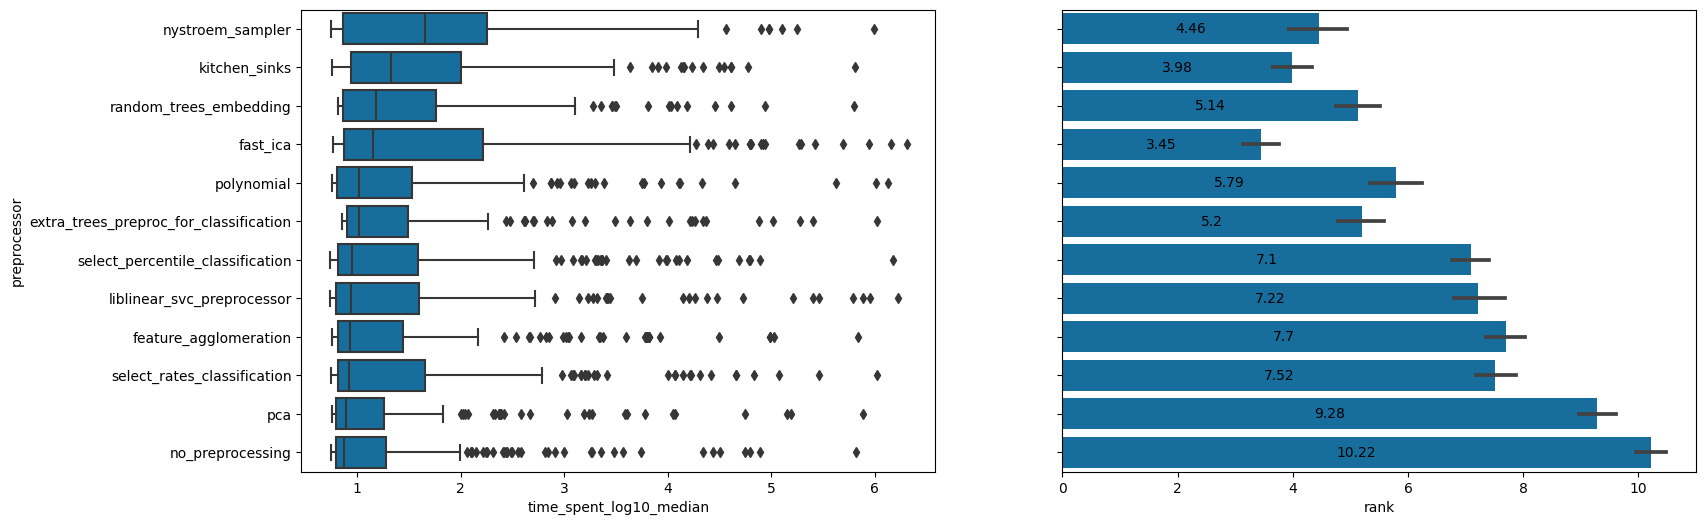

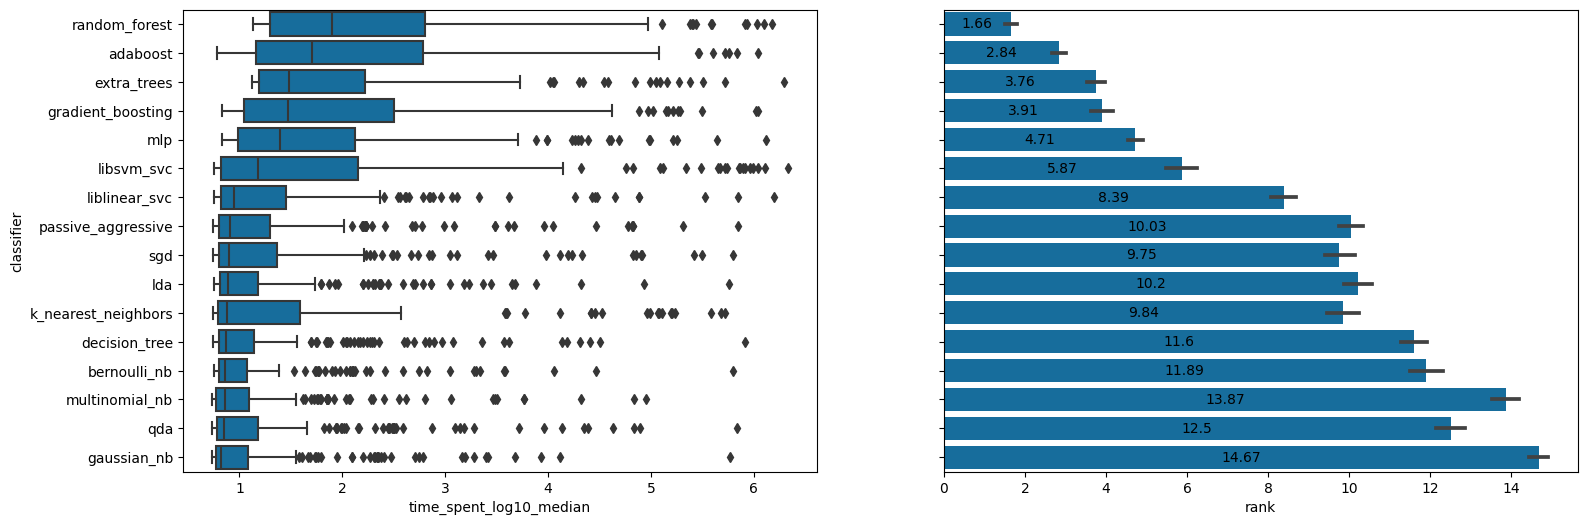

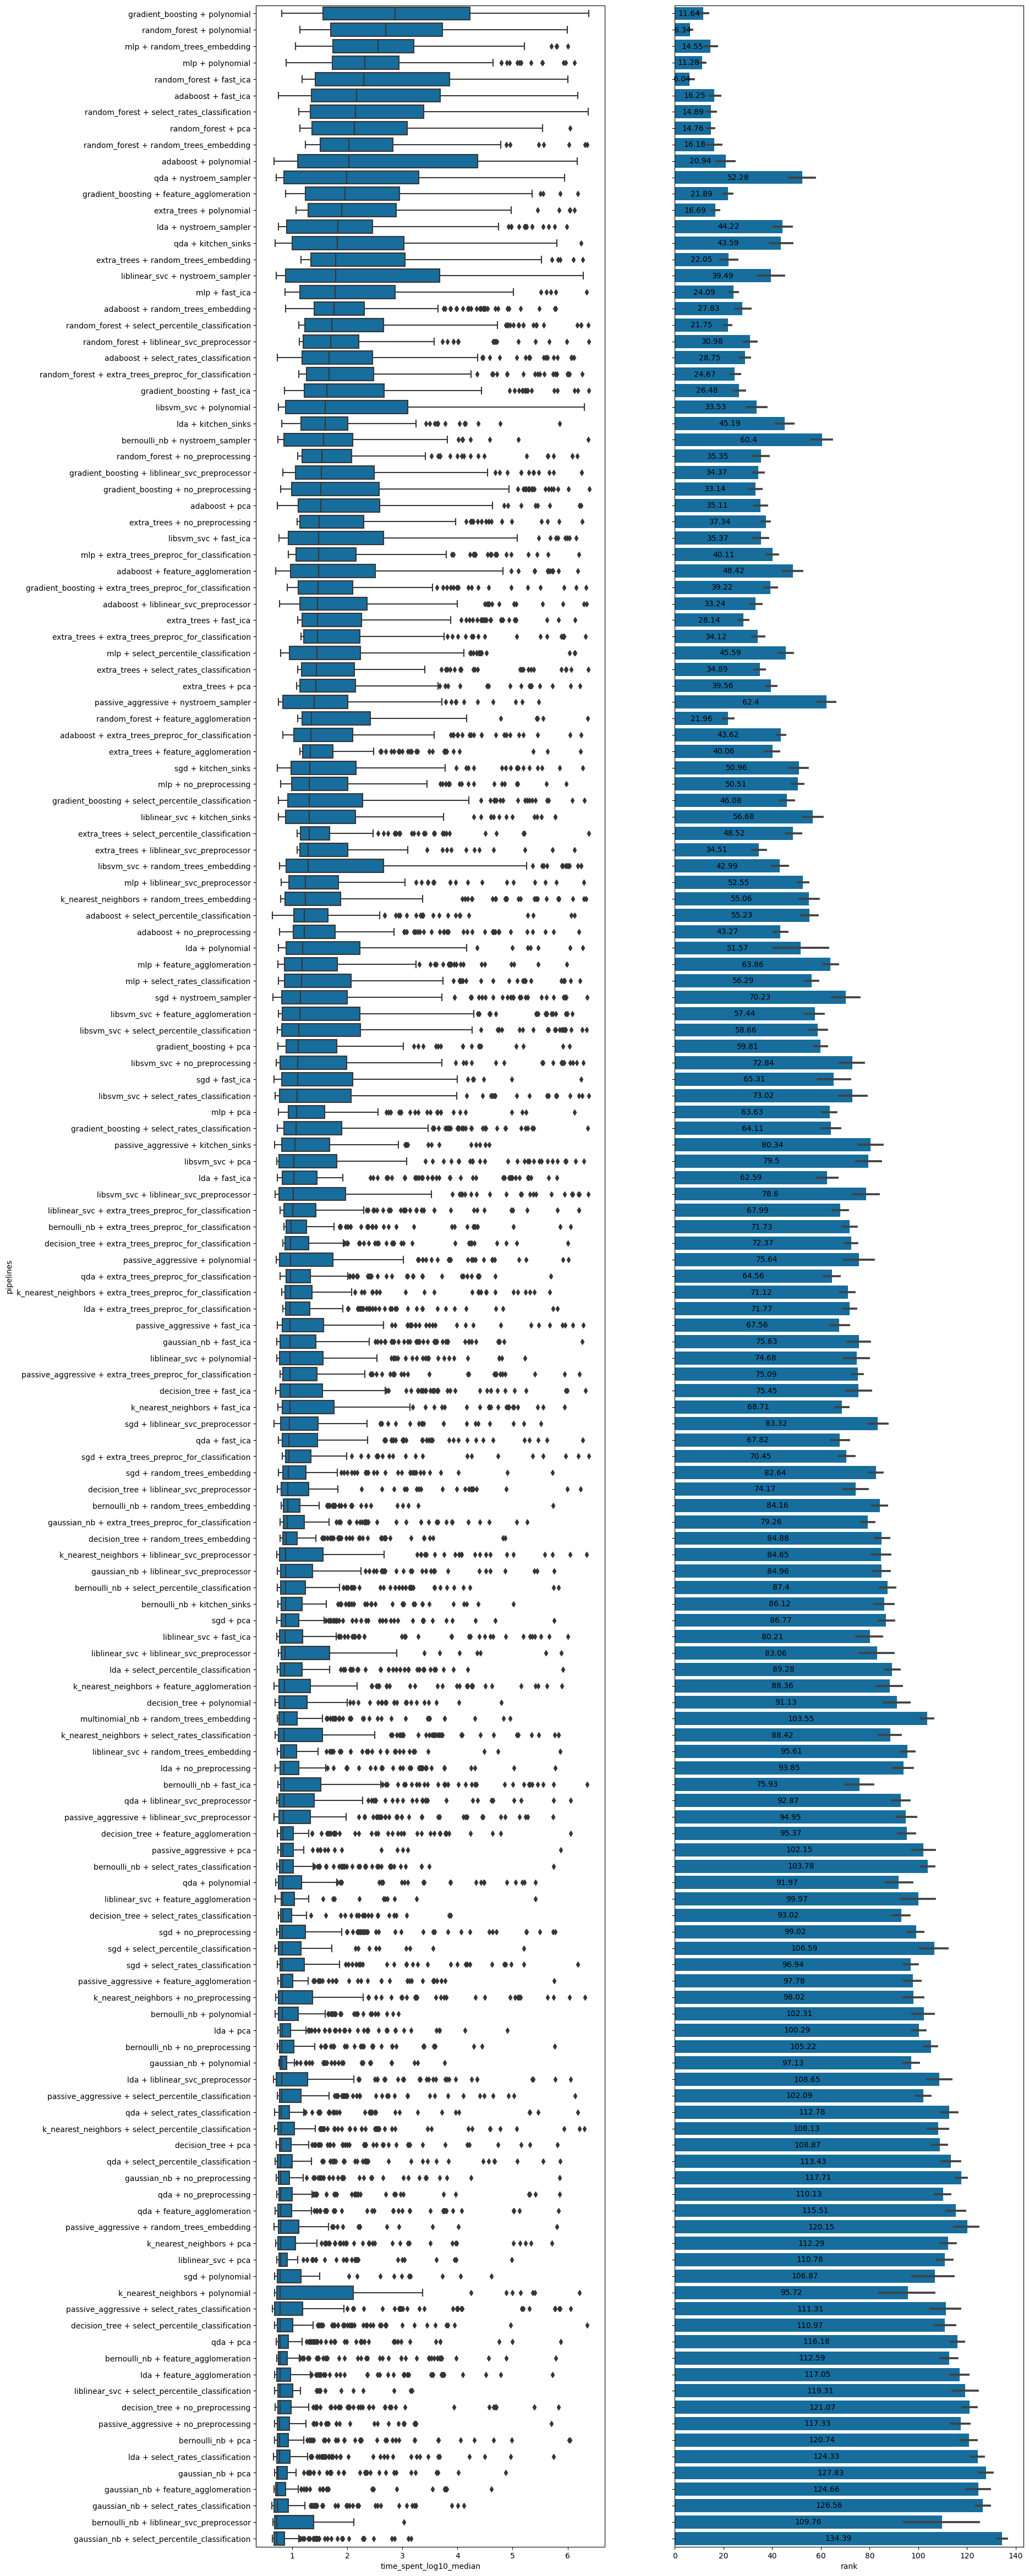

In [32]:
measure = "time_spent_log10"
how = "median"
dfs_aux = dfs[dfs["success"] == 1]

for c in ["preprocessor", "classifier", "pipelines"]:
    figsize =  (18, 6) if c != "pipelines" else (18, 60)
    a, b, c = plot_boxplot_time_spent(dfs_aux, measure, c, ["dataset", c], how=how, figsize=figsize, directory="training_time_spent/")

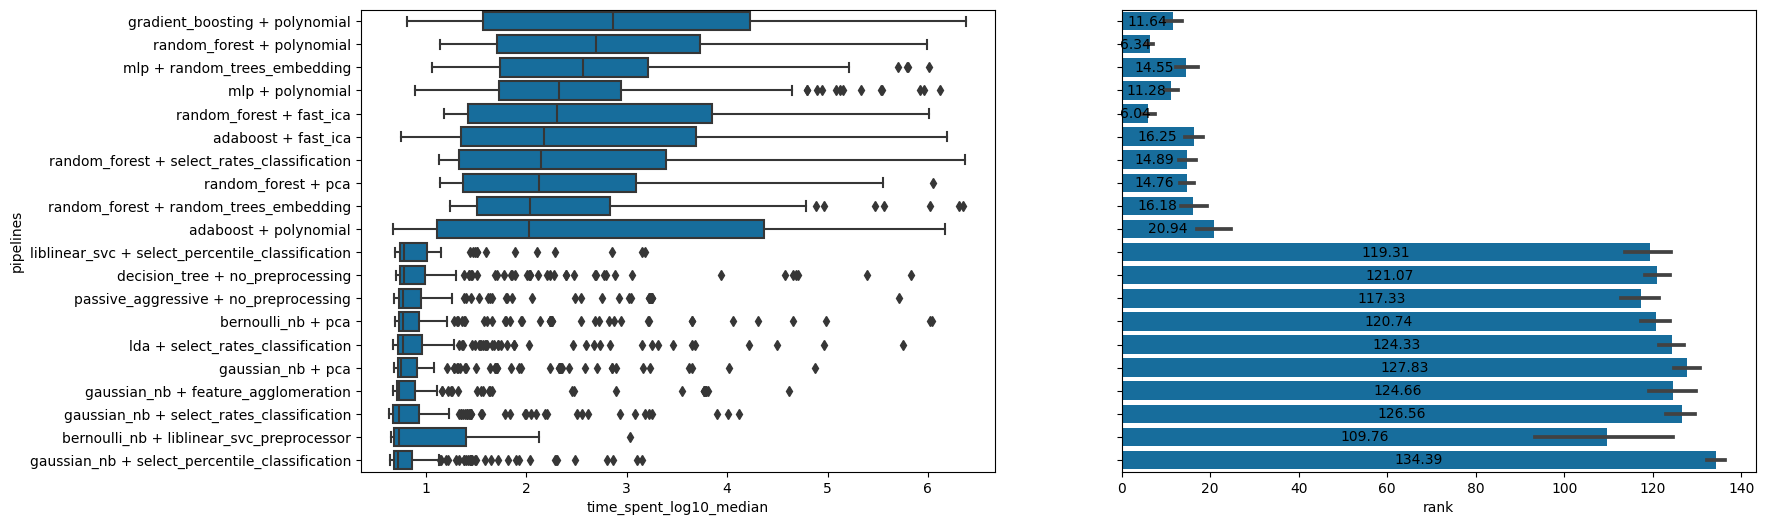

In [33]:
measure = "time_spent_log10"
how = "median"
dfs_aux = dfs[dfs["success"] == 1]

for c in ["pipelines"]:
    figsize =  (18, 6)
    a, b, c = plot_boxplot_time_spent(dfs_aux, measure, c, ["dataset", c], how=how, figsize=figsize, directory="training_time_spent/", top20=True)

In [37]:
def plot_failure(dfs, interest_col, group_by_cols, figsize=(18, 6), directory="result/", top20=False):

    if not os.path.exists(directory):
        os.makedirs(directory)


    aux = dfs \
        .groupby(interest_col) \
        .agg(success=("success", "sum"), timeout=("timeout", "sum"), memout=("memout", "sum"))
        # .agg(success=("success", "sum"), crashed=("crashed", "sum"), timeout=("timeout", "sum"), memout=("memout", "sum"))
    
    
    f, axes = plt.subplots(1, 1, figsize=figsize)

    aux = aux.div(aux.sum(axis=1), axis="index") * 100
    aux =  aux.sort_values(by="success", ascending=True)

    if top20:
        aux = pd.concat([aux.head(10), aux.tail(10)])
    
    g = aux.plot(kind='barh', stacked=True,  width=0.8, color=MY_PALLETE, ax=axes)
    for c in g.containers:
        # Optional: if the segment is small or 0, customize the labels
        labels = [round(v.get_width()) if round(v.get_width()) > 0 else '' for v in c]
        
        # remove the labels parameter if it's not needed for customized labels
        g.bar_label(c, labels=labels, label_type='center')
    g.set_xlabel("%")


    file_name = f"failure_of_{interest_col}_grouped_by_{'-'.join(group_by_cols)}"
    file_name = file_name+"_10g_10b" if top20 else file_name
    file_name = directory+file_name

    # save figure
    f.savefig(f"{file_name}.pdf", bbox_inches = 'tight') 
    plt.show()

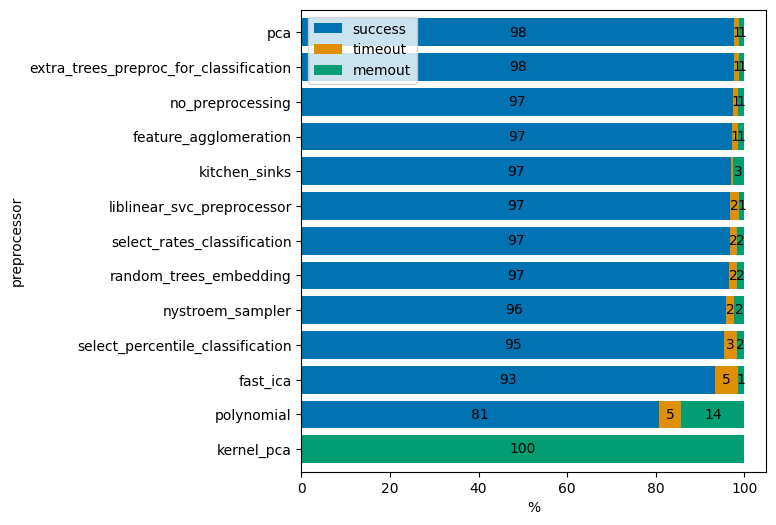

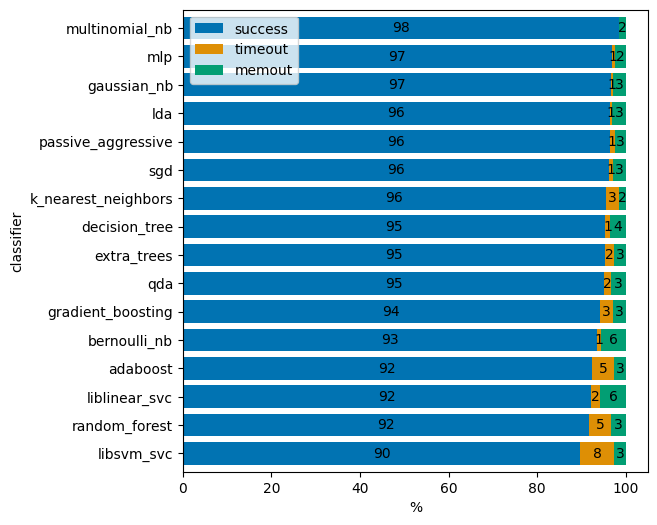

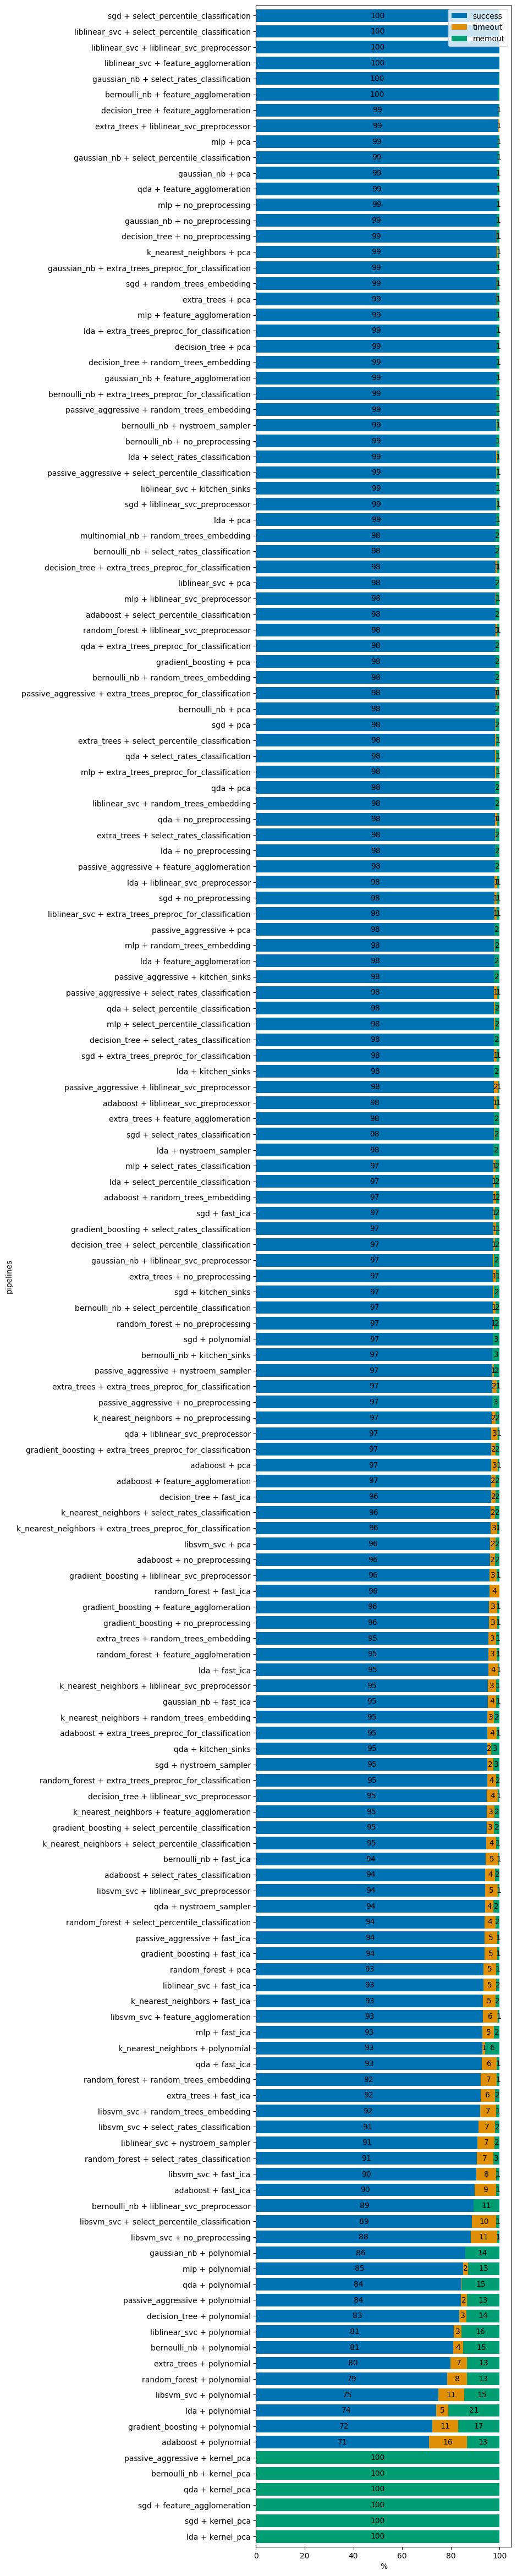

In [38]:
for c in ["preprocessor", "classifier", "pipelines"]:
    figsize =  (6, 6) if c != "pipelines" else (6, 60)
    plot_failure(dfs, c, ["dataset", c], figsize=figsize, directory="failure/")

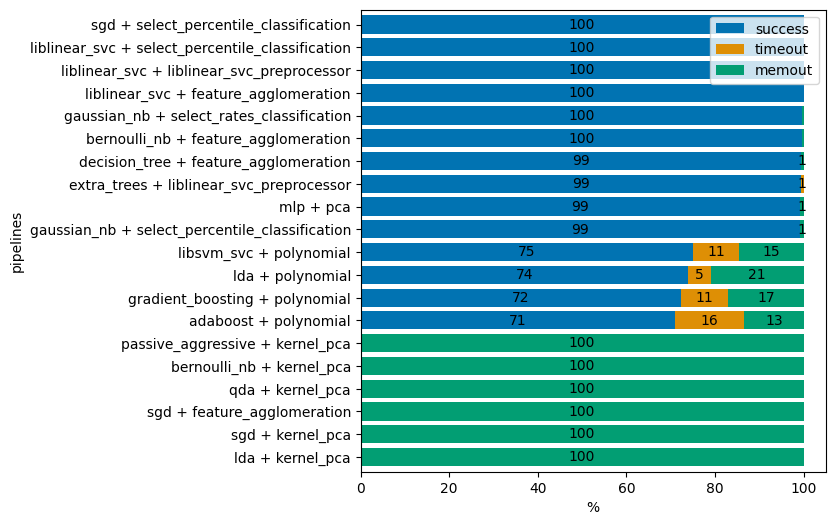

In [39]:
for c in ["pipelines"]:
    figsize =  (6, 6)
    plot_failure(dfs, c, ["dataset", c], figsize=figsize, directory="failure/", top20=True)